<a href="https://colab.research.google.com/github/nelslindahlx/Random-Notebooks/blob/master/advanced_chaos_mathematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Chaos Mathematics with Logistic Map and Lorenz System
This notebook demonstrates advanced chaos mathematics concepts using the logistic map and the Lorenz system. Both are simple mathematical models that can exhibit chaotic behavior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Logistic Map
def logistic_map(r, x):
    return r * x * (1 - x)

def generate_sequence(r, x0, n):
    """Generates a sequence of n values using the logistic map."""
    sequence = np.zeros(n)
    sequence[0] = x0
    for i in range(1, n):
        sequence[i] = logistic_map(r, sequence[i-1])
    return sequence

def plot_sequence(r, x0, n):
    """Plots the sequence generated by the logistic map."""
    sequence = generate_sequence(r, x0, n)
    plt.plot(sequence, 'o-', markersize=3)
    plt.title(f'Logistic Map (r={r}, x0={x0})')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()

def bifurcation_diagram(r_min, r_max, n, iterations, last):
    """Plots the bifurcation diagram for the logistic map."""
    r_values = np.linspace(r_min, r_max, n)
    x = 1e-5 * np.ones(n)

    plt.figure(figsize=(10, 7))
    for i in range(iterations):
        x = logistic_map(r_values, x)
        if i >= (iterations - last):
            plt.plot(r_values, x, ',k', alpha=0.25)

    plt.title('Bifurcation Diagram')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.show()

# Lorenz System
def lorenz_system(sigma, beta, rho, initial_state, t_max, dt):
    """Solves the Lorenz system using the Euler method."""
    num_steps = int(t_max / dt)
    states = np.zeros((num_steps, 3))
    states[0] = initial_state

    for i in range(1, num_steps):
        x, y, z = states[i-1]
        dx = sigma * (y - x) * dt
        dy = (x * (rho - z) - y) * dt
        dz = (x * y - beta * z) * dt
        states[i] = states[i-1] + np.array([dx, dy, dz])

    return states

def plot_lorenz(states):
    """Plots the Lorenz attractor."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(states[:,0], states[:,1], states[:,2], lw=0.5)
    ax.set_title('Lorenz Attractor')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


## Example: Logistic Map Sequence
Generate and plot a sequence using the logistic map with example parameters.

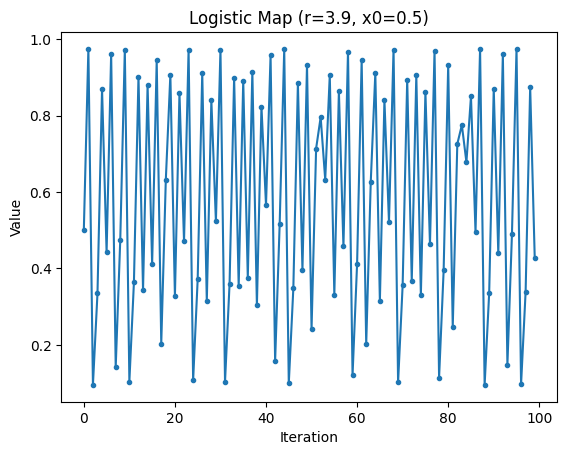

In [2]:
# Example parameters
r = 3.9
x0 = 0.5
n = 100

# Generate and plot logistic map sequence
plot_sequence(r, x0, n)

## Example: Bifurcation Diagram
Plot the bifurcation diagram for the logistic map.

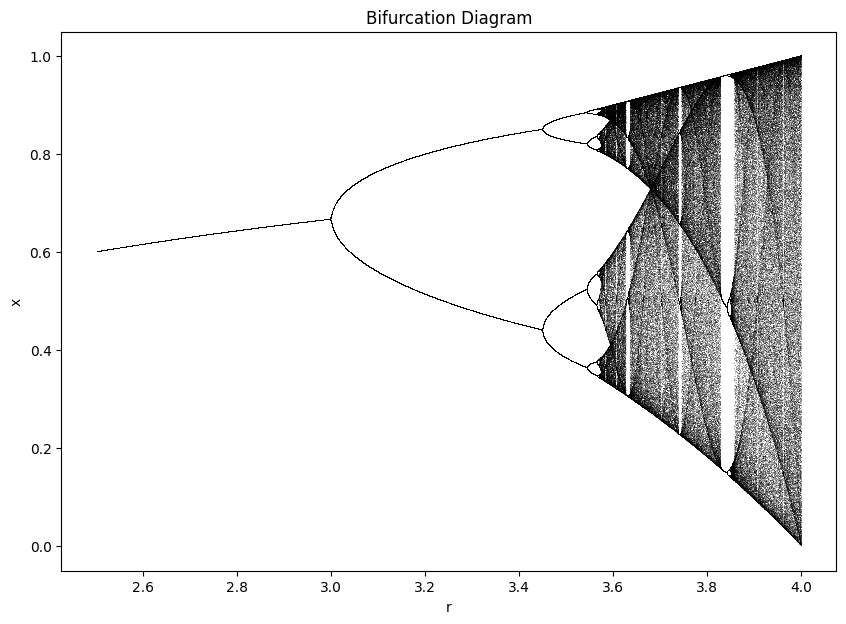

In [3]:
# Plot bifurcation diagram
bifurcation_diagram(2.5, 4.0, 10000, 1000, 100)

## Example: Lorenz System
Solve and plot the Lorenz system with example parameters.

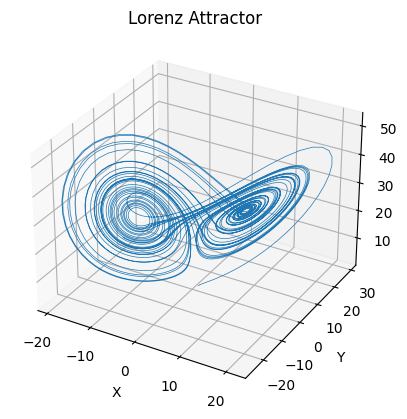

In [4]:
# Example parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
initial_state = [1.0, 1.0, 1.0]
t_max = 50.0
dt = 0.01

# Solve and plot Lorenz system
states = lorenz_system(sigma, beta, rho, initial_state, t_max, dt)
plot_lorenz(states)